In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# **Q.4 A first Gibbs sampler**

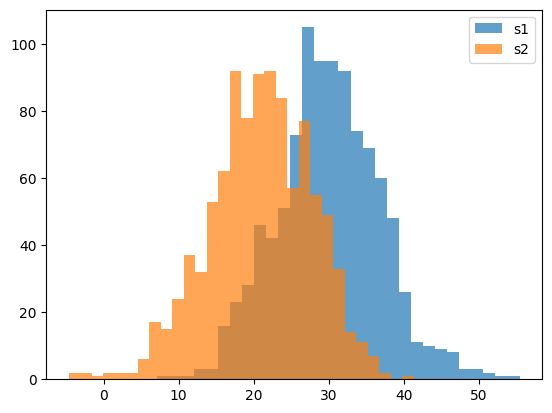

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists
        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 1000
y = 1  # Player 1 wins
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()
plt.show()

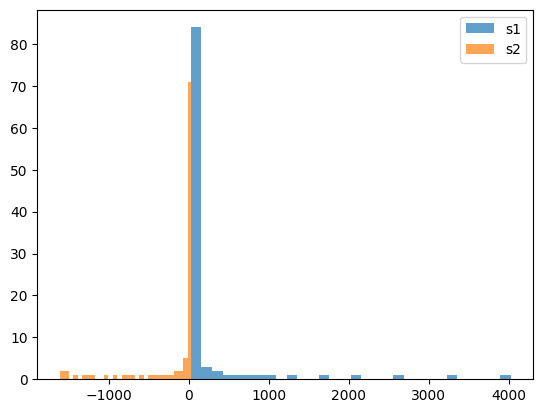

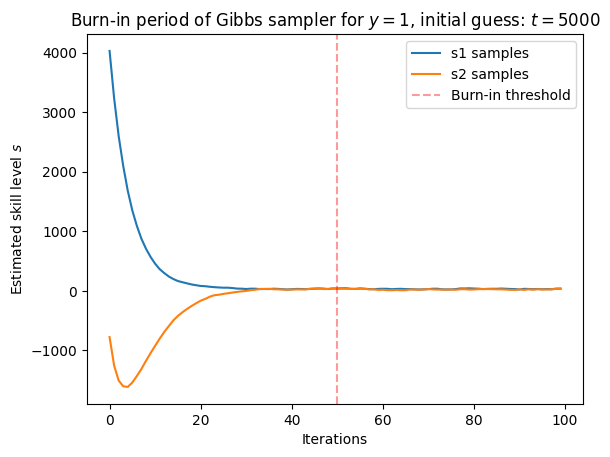

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 5000 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        samples_s1.append(s1)
        samples_s2.append(s2)
        iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 100
y = 1  # Player 1 wins
burn_in = 50
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()

plt.figure(2)
plt.title(r"Burn-in period of Gibbs sampler for $y=1$, initial guess: $t = 5000$")
plt.xlabel("Iterations")
plt.ylabel(r"Estimated skill level $s$")
plt.plot(iterations, samples_s1, label ='s1 samples')
plt.plot(iterations, samples_s2, label ='s2 samples')
plt.axvline(x=burn_in, color='red', linestyle='--', label='Burn-in threshold', alpha=0.4)
plt.legend()
plt.show()

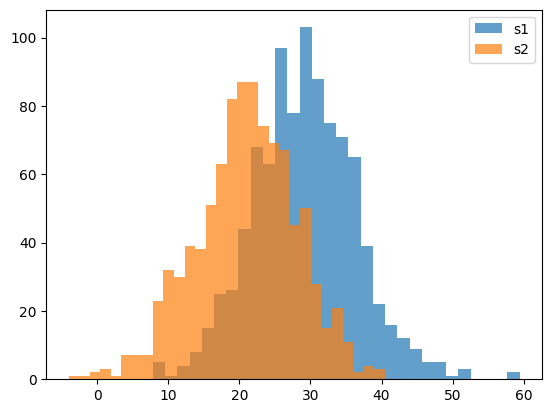

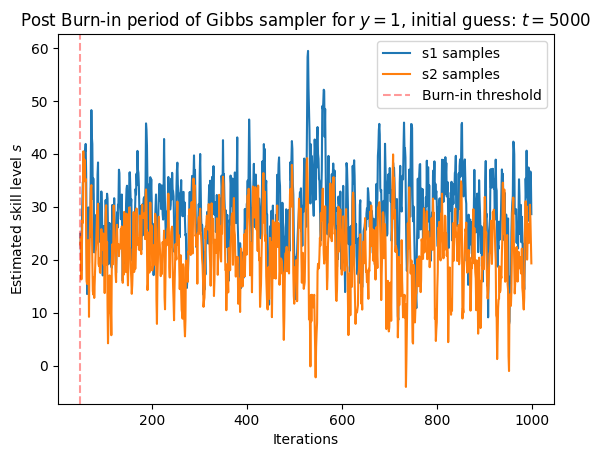

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Set up hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players
beta = 4.166  # variance for performance difference

#t is initial guess, intial guess of t used to sample from s1, s2 --> then t. (t is given)

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t


# Step 2: Gibbs Sampler core
def gibbs_sampler(num_iterations, y, burn_in):
    # Initialize s1 and s2 with their prior means
    s1 = mu
    s2 = mu
    t = 5000 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []
    iterations = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu, sigma, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu, sigma, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)
            iterations.append(i)

    return np.array(samples_s1), np.array(samples_s2), iterations

# Example: Run Gibbs Sampler with 1000 iterations
num_iterations = 1000
y = 1  # Player 1 wins
burn_in = 50
samples_s1, samples_s2, iterations = gibbs_sampler(num_iterations, y, burn_in)

# Plot histograms of the samples for s1 and s2
plt.figure(1)
plt.hist(samples_s1, bins=30, alpha=0.7, label='s1')
plt.hist(samples_s2, bins=30, alpha=0.7, label='s2')
plt.legend()

plt.figure(2)
plt.title(r"Post Burn-in period of Gibbs sampler for $y=1$, initial guess: $t = 5000$")
plt.xlabel("Iterations")
plt.ylabel(r"Estimated skill level $s$")
plt.plot(iterations, samples_s1, label ='s1 samples')
plt.plot(iterations, samples_s2, label ='s2 samples')
plt.axvline(x=burn_in, color='red', linestyle='--', label='Burn-in threshold', alpha=0.4)
plt.legend()
plt.show()

# **Q.5 Assumed Density Filtering (Moment matching)**

In [1]:
# Loading in the raw SerieA file url from Github
#Can be accessed from: https://github.com/dannem1337/APML-Project/blob/main/data/SerieA.csv
#Copy "Raw"
import pandas as pd

url = 'https://raw.githubusercontent.com/dannem1337/APML-Project/refs/heads/main/data/SerieA.csv?token=GHSAT0AAAAAACXOR42WBOB3VCKNBSQKRBM6ZXT3AEA'
serieA = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna()
print(serieA)

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]


In [2]:
url = 'https://raw.githubusercontent.com/dannem1337/APML-Project/refs/heads/main/data/SerieA.csv?token=GHSAT0AAAAAACXOR42WBOB3VCKNBSQKRBM6ZXT3AEA'
serieA2 = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna()
print(serieA2)

     yyyy-mm-dd  HH:MM       team1     team2  score1  score2
0    2018-08-18  18:00      Chievo  Juventus       2       3
1    2018-08-18  20:30       Lazio    Napoli       1       2
2    2018-08-19  18:00      Torino      Roma       0       1
3    2018-08-19  20:30    Sassuolo     Inter       1       0
4    2018-08-19  20:30       Parma   Udinese       2       2
..          ...    ...         ...       ...     ...     ...
375  2019-05-26  20:30        Roma     Parma       2       1
376  2019-05-26  20:30       Inter    Empoli       2       1
377  2019-05-26  20:30  Fiorentina     Genoa       0       0
378  2019-05-26  20:30    Cagliari   Udinese       1       2
379  2019-05-26  20:30    Atalanta  Sassuolo       3       1

[380 rows x 6 columns]


In [4]:
serieA2['winner'] = serieA2.apply(lambda x: x['team2'] if x['score1'] < x['score2']
                     else (x['team1'] if x['score1'] > x['score2'] else 'TIE'), axis=1)

# Drop rows with 'TIE'
serieA2.drop(serieA2.loc[serieA2['winner'] == 'TIE'].index, inplace=True)

serieA2['y'] = serieA2.apply((lambda x: 1 if x['winner'] == x['team1'] else -1), axis=1)

# Reset index and reassign
serieA2.reset_index(drop=True, inplace=True)

# Assuming you already have the dataframe 'df'
# Create a new column 'loser' which is the team that lost
serieA2['loser'] = serieA2.apply(lambda row: row['team1'] if row['winner'] == row['team2'] else row['team2'], axis=1)

# Calculate wins: count how many times each team appears as the winner
wins = serieA2['winner'].value_counts().reset_index()
wins.columns = ['team', 'wins']

# Calculate losses: count how many times each team appears as the loser
losses = serieA2['loser'].value_counts().reset_index()
losses.columns = ['team', 'losses']

# Merge the wins and losses dataframes
team_stats = pd.merge(wins, losses, on='team', how='outer').fillna(0)

# Convert wins and losses to integer type
team_stats['wins'] = team_stats['wins'].astype(int)
team_stats['losses'] = team_stats['losses'].astype(int)
print(team_stats)

          team  wins  losses
0     Juventus    28       4
1       Napoli    24       7
2     Atalanta    20       9
3        Inter    20       9
4        Milan    19       8
5         Roma    18       8
6        Lazio    17      13
7       Torino    16       7
8    Sampdoria    15      15
9         Spal    11      18
10     Udinese    11      17
11     Bologna    11      16
12      Empoli    10      20
13    Cagliari    10      17
14       Parma    10      17
15    Sassuolo     9      13
16       Genoa     8      16
17  Fiorentina     8      13
18   Frosinone     5      23
19      Chievo     2      22


In [5]:
serieA['winner'] = serieA.apply(lambda x: x['team2'] if x['score1'] < x['score2']
                     else (x['team1'] if x['score1'] > x['score2'] else 'TIE'), axis=1)

# Drop rows with 'TIE'
serieA.drop(serieA.loc[serieA['winner'] == 'TIE'].index, inplace=True)

serieA['y'] = serieA.apply((lambda x: 1 if x['winner'] == x['team1'] else -1), axis=1)

# serieA.drop(serieA[['yyyy-mm-dd', 'HH:MM', 'score1', 'score2']])

# Reset index and reassign
serieA.reset_index(drop=True, inplace=True)

# Print the updated DataFrame
print(serieA)

     yyyy-mm-dd  HH:MM     team1     team2  score1  score2    winner  y
0    2018-08-18  18:00    Chievo  Juventus       2       3  Juventus -1
1    2018-08-18  20:30     Lazio    Napoli       1       2    Napoli -1
2    2018-08-19  18:00    Torino      Roma       0       1      Roma -1
3    2018-08-19  20:30  Sassuolo     Inter       1       0  Sassuolo  1
4    2018-08-19  20:30    Empoli  Cagliari       2       0    Empoli  1
..          ...    ...       ...       ...     ...     ...       ... ..
267  2019-05-26  20:30      Spal     Milan       2       3     Milan -1
268  2019-05-26  20:30      Roma     Parma       2       1      Roma  1
269  2019-05-26  20:30     Inter    Empoli       2       1     Inter  1
270  2019-05-26  20:30  Cagliari   Udinese       1       2   Udinese -1
271  2019-05-26  20:30  Atalanta  Sassuolo       3       1  Atalanta  1

[272 rows x 8 columns]


In [9]:
teams1 = serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

All_teams_dict = {}

for i in All_teams:
    All_teams_dict[i] = mu, sigma

All_teams_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [ ]:
game1 = serieA.iloc[0][['team1', 'team2', 'winner']].to_list()
print(game1)

for i in game1:
    print(f"{i} : {All_teams_dict[i]}")

['Chievo', 'Juventus', 'Juventus']
Chievo : (25, 8.333)
Juventus : (25, 8.333)
Juventus : (25, 8.333)


In [ ]:
# x,y = All_teams_dict['Juventus']
# print(x,y)

In [ ]:
# for index, row in serieA.iterrows():
#     print(row['team1'], "-", row['team2'], "| winner:", row['winner'], "=>", row['y'])

In [10]:
beta = 4.1666

# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t

def serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 1000
    burn_in = 50
    samples_s1, samples_s2 = serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1) #New mu is based on the average of the distributions
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2) #Not sure if this is the way it's supposed to be used

#"MAIN" for running update_ranking function
#Iterate over each row and update the mu for each team
for index, row in serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = All_teams_dict[team1]
        mu2, sigma2 = All_teams_dict[team2]

        update_ranking(All_teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

print(All_teams_dict)

{'Atalanta': (28.48618401644236, 1.3324582117051236), 'Bologna': (24.349750144066363, 1.4186535772167044), 'Cagliari': (22.918442094242653, 1.451333312506457), 'Chievo': (17.963819627251013, 2.324259278597177), 'Empoli': (23.43236318396097, 1.2914853061683849), 'Fiorentina': (21.477920434144846, 1.6118128654999304), 'Frosinone': (19.61048385130534, 1.4379289567906053), 'Genoa': (23.66316362667488, 1.4516036405603472), 'Inter': (28.2525802067547, 1.2286670187063147), 'Juventus': (28.54693349311551, 1.8873242637606702), 'Lazio': (25.806776868946823, 1.2132890793988667), 'Milan': (28.71721219286131, 1.6557607087484247), 'Napoli': (28.836308534354373, 1.5005602250972194), 'Parma': (23.15719067725055, 1.1483493170826877), 'Roma': (27.357613013349894, 1.5276556310736344), 'Sampdoria': (24.30997733575279, 1.2836336701816602), 'Sassuolo': (21.65512745544607, 1.5343215014643783), 'Spal': (24.323352898526082, 1.5258882910118323), 'Torino': (27.345975368699783, 1.4874865894644227), 'Udinese': (23

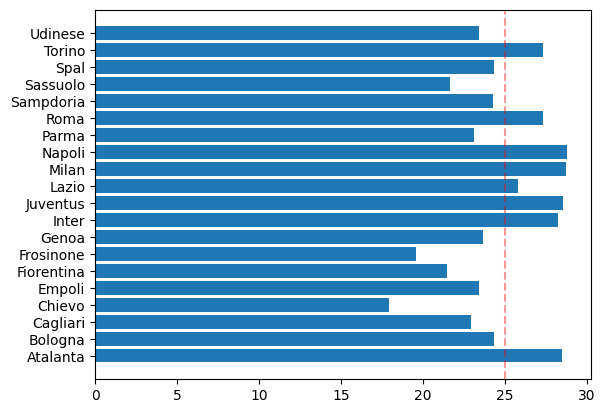

In [11]:
teams_list = list(All_teams_dict.keys())
skills_list = [i[0] for i in list(All_teams_dict.values())]

plt.barh(teams_list, skills_list)
plt.axvline(x=25, color='red', linestyle='--', label='sigma prior', alpha=0.4)
plt.show()

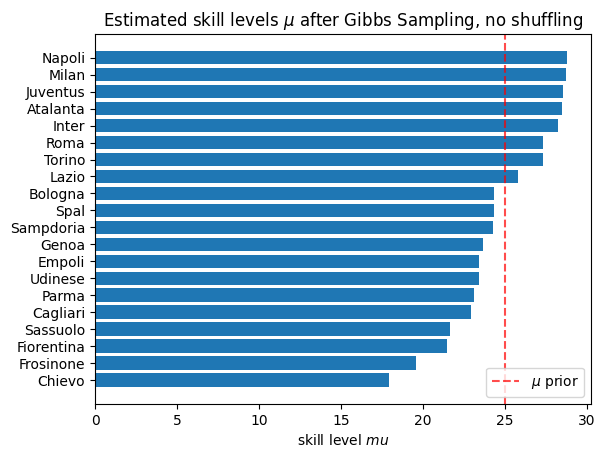

In [14]:
teams_sorted_by_skill = dict(sorted(All_teams_dict.items(), key=lambda x: x[1][0]))

sorted_teams_list = list(teams_sorted_by_skill.keys())
sorted_skills_list = [i[0] for i in list(teams_sorted_by_skill.values())]

plt.barh(sorted_teams_list, sorted_skills_list)
plt.axvline(x=25, color='red', linestyle='--', label=r'$\mu$ prior', alpha=0.7)

plt.title(r'Estimated skill levels $\mu$ after Gibbs Sampling, no shuffling')
plt.xlabel('skill level $mu$')
plt.legend()
plt.show()

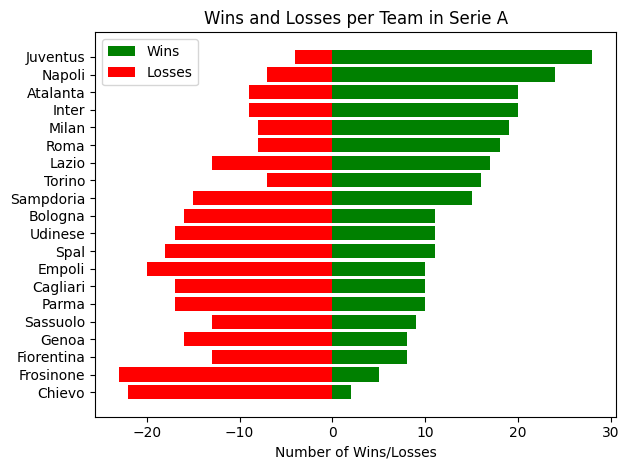

In [15]:
# Sort the data by wins for a clearer visualization
team_stats = team_stats.sort_values('wins', ascending=True)

# Plot wins as horizontal bars
plt.barh(team_stats['team'], team_stats['wins'], color='green', label='Wins')

# Plot losses as horizontal bars, slightly shifted to the right for better visibility
plt.barh(team_stats['team'], -team_stats['losses'], color='red', label='Losses')

# Add labels and title
plt.xlabel('Number of Wins/Losses')
plt.title('Wins and Losses per Team in Serie A')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [16]:
# shuffle the DataFrame rows
shuffled_serieA = serieA.sample(frac = 1)
shuffled_serieA

,yyyy-mm-dd,HH:MM,team1,team2,score1,score2,winner,y
2,2018-08-19,18:00,Torino,Roma,0,1,Roma,-1
246,2019-05-05,15:00,Lazio,Atalanta,1,3,Atalanta,-1
140,2019-01-26,15:00,Sassuolo,Cagliari,3,0,Sassuolo,1
54,2018-10-01,20:30,Sampdoria,Spal,2,1,Sampdoria,1
156,2019-02-10,15:00,Sampdoria,Frosinone,0,1,Frosinone,-1
...,...,...,...,...,...,...,...,...
4,2018-08-19,20:30,Empoli,Cagliari,2,0,Empoli,1
224,2019-04-13,18:00,Roma,Udinese,1,0,Roma,1
74,2018-10-28,18:00,Milan,Sampdoria,3,2,Milan,1
271,2019-05-26,20:30,Atalanta,Sassuolo,3,1,Atalanta,1


In [17]:
teams1 = shuffled_serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

Shuffled_teams_dict = {}

for i in All_teams:
    Shuffled_teams_dict[i] = mu, sigma

Shuffled_teams_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [18]:
# Function to sample s1 given s2 and t
def sample_s1(s2, t, mu, sigma, beta):
    # Conditional mean and variance for s1 given t and s2
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    # print(cond_var)
    cond_mean = cond_var * ((mu / sigma**2) + (t + s2) / beta**2)
    # print(cond_mean)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample s2 given s1 and t
def sample_s2(s1, t, mu, sigma, beta):
    # Conditional mean and variance for s2 given t and s1
    cond_var = 1 / (1/sigma**2 + 1/beta**2)
    cond_mean = cond_var * ((mu / sigma**2) + (s1 - t) / beta**2)
    return np.random.normal(cond_mean, np.sqrt(cond_var))

# Function to sample t (the performance difference) using truncated normal
def sample_t(s1, s2, beta, y):
    mean_t = s1 - s2
    if y == 1:
        a, b = 0, np.inf  # t is truncated at 0 from below
    else:
        a, b = -np.inf, 0  # t is truncated at 0 from above
    t = stats.truncnorm.rvs(a=(a - mean_t) / beta, b=(b - mean_t) / beta, loc=mean_t, scale=beta) #SciPy's function is based on standardized bounds for N(0,1)
    return t

def serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2):
    # Initialize s1 and s2 with their prior means
    s1 = mu1
    s2 = mu2
    t = 0 #Initial guess

    # Store samples of s1 and s2
    samples_s1 = []
    samples_s2 = []

    for i in range(num_iterations):

        # Sample s1 given t and s2
        s1 = sample_s1(s2, t, mu1, sigma1, beta)

        # Sample s2 given t and s1
        s2 = sample_s2(s1, t, mu2, sigma2, beta)

        # Sample t given s1, s2, and y
        t = sample_t(s1, s2, beta, y)

        # Append samples to lists (after burn-in)
        if i >= burn_in:
            # Append samples to lists
            samples_s1.append(s1)
            samples_s2.append(s2)

    return np.array(samples_s1), np.array(samples_s2)

def update_ranking(teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2):
    num_iterations = 1000
    burn_in = 50
    samples_s1, samples_s2 = serieA_gibbs_sampler(num_iterations, y, burn_in, mu1, mu2, sigma1, sigma2)

    teams_dict[team1] = np.mean(samples_s1), np.std(samples_s1)
    teams_dict[team2] = np.mean(samples_s2), np.std(samples_s2)

#"MAIN" for running update_ranking function
#Iterate over each row and update the mu for each team
for index, row in shuffled_serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = All_teams_dict[team1]
        mu2, sigma2 = All_teams_dict[team2]

        update_ranking(Shuffled_teams_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

print(Shuffled_teams_dict)

{'Atalanta': (28.509153415768225, 1.3495076947372253), 'Bologna': (24.197241532490207, 1.3202701347566275), 'Cagliari': (22.53854788019071, 1.4056937630119792), 'Chievo': (17.647404520193675, 2.1818219522368283), 'Empoli': (23.721942786154464, 1.3113685782231717), 'Fiorentina': (21.44007474331046, 1.600505671330092), 'Frosinone': (20.2918083627113, 1.3868441368281121), 'Genoa': (23.313849294254382, 1.4410426461681274), 'Inter': (28.00780958753518, 1.2462229363483268), 'Juventus': (28.81537175400039, 1.821735550588956), 'Lazio': (25.90865159375751, 1.173516802276339), 'Milan': (28.88194676300703, 1.6154058021345068), 'Napoli': (29.27561598370573, 1.5098973493504453), 'Parma': (23.39988794884893, 1.1416590735217704), 'Roma': (27.619936120056146, 1.440708896065735), 'Sampdoria': (24.10980547117556, 1.2245936811448959), 'Sassuolo': (21.88777688150883, 1.5201076700449625), 'Spal': (23.54966294560813, 1.4798333296173392), 'Torino': (27.553490387137423, 1.5255084221031117), 'Udinese': (23.303

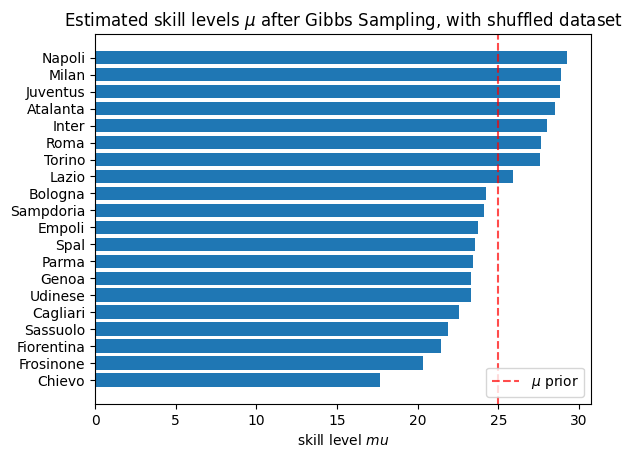

In [19]:
teams_sorted_by_skill = dict(sorted(Shuffled_teams_dict.items(), key=lambda x: x[1][0]))

sorted_teams_list = list(teams_sorted_by_skill.keys())
sorted_skills_list = [i[0] for i in list(teams_sorted_by_skill.values())]

plt.barh(sorted_teams_list, sorted_skills_list)
plt.axvline(x=25, color='red', linestyle='--', label=r'$\mu$ prior', alpha=0.7)

plt.title(r'Estimated skill levels $\mu$ after Gibbs Sampling, with shuffled dataset')
plt.xlabel('skill level $mu$')
plt.legend()
plt.show()

In [21]:
All_teams_dict

{'Atalanta': (28.48618401644236, 1.3324582117051236),
 'Bologna': (24.349750144066363, 1.4186535772167044),
 'Cagliari': (22.918442094242653, 1.451333312506457),
 'Chievo': (17.963819627251013, 2.324259278597177),
 'Empoli': (23.43236318396097, 1.2914853061683849),
 'Fiorentina': (21.477920434144846, 1.6118128654999304),
 'Frosinone': (19.61048385130534, 1.4379289567906053),
 'Genoa': (23.66316362667488, 1.4516036405603472),
 'Inter': (28.2525802067547, 1.2286670187063147),
 'Juventus': (28.54693349311551, 1.8873242637606702),
 'Lazio': (25.806776868946823, 1.2132890793988667),
 'Milan': (28.71721219286131, 1.6557607087484247),
 'Napoli': (28.836308534354373, 1.5005602250972194),
 'Parma': (23.15719067725055, 1.1483493170826877),
 'Roma': (27.357613013349894, 1.5276556310736344),
 'Sampdoria': (24.30997733575279, 1.2836336701816602),
 'Sassuolo': (21.65512745544607, 1.5343215014643783),
 'Spal': (24.323352898526082, 1.5258882910118323),
 'Torino': (27.345975368699783, 1.487486589464422

In [20]:
Shuffled_teams_dict

{'Atalanta': (28.509153415768225, 1.3495076947372253),
 'Bologna': (24.197241532490207, 1.3202701347566275),
 'Cagliari': (22.53854788019071, 1.4056937630119792),
 'Chievo': (17.647404520193675, 2.1818219522368283),
 'Empoli': (23.721942786154464, 1.3113685782231717),
 'Fiorentina': (21.44007474331046, 1.600505671330092),
 'Frosinone': (20.2918083627113, 1.3868441368281121),
 'Genoa': (23.313849294254382, 1.4410426461681274),
 'Inter': (28.00780958753518, 1.2462229363483268),
 'Juventus': (28.81537175400039, 1.821735550588956),
 'Lazio': (25.90865159375751, 1.173516802276339),
 'Milan': (28.88194676300703, 1.6154058021345068),
 'Napoli': (29.27561598370573, 1.5098973493504453),
 'Parma': (23.39988794884893, 1.1416590735217704),
 'Roma': (27.619936120056146, 1.440708896065735),
 'Sampdoria': (24.10980547117556, 1.2245936811448959),
 'Sassuolo': (21.88777688150883, 1.5201076700449625),
 'Spal': (23.54966294560813, 1.4798333296173392),
 'Torino': (27.553490387137423, 1.5255084221031117),


# **Q6 Using the model for predictions**

In [32]:
teams1 = serieA['team1'].unique()

All_teams = sorted(teams1)

#Hyperparameters
mu = 25  # prior mean for both players
sigma = 8.333  # prior standard deviation for both players

All_teams_clean_dict = {}

for i in All_teams:
    All_teams_clean_dict[i] = mu, sigma

All_teams_clean_dict

{'Atalanta': (25, 8.333),
 'Bologna': (25, 8.333),
 'Cagliari': (25, 8.333),
 'Chievo': (25, 8.333),
 'Empoli': (25, 8.333),
 'Fiorentina': (25, 8.333),
 'Frosinone': (25, 8.333),
 'Genoa': (25, 8.333),
 'Inter': (25, 8.333),
 'Juventus': (25, 8.333),
 'Lazio': (25, 8.333),
 'Milan': (25, 8.333),
 'Napoli': (25, 8.333),
 'Parma': (25, 8.333),
 'Roma': (25, 8.333),
 'Sampdoria': (25, 8.333),
 'Sassuolo': (25, 8.333),
 'Spal': (25, 8.333),
 'Torino': (25, 8.333),
 'Udinese': (25, 8.333)}

In [33]:
def prediction(mu1, mu2):
    return 1 if mu1 > mu2 else -1

correct_guess = 0
total_guess = 0

# MAIN" for running update_ranking function
#Iterate over each row and update the mu for each team
for index, row in serieA.iterrows():
        y = row['y']
        team1 = row['team1']
        team2 = row['team2']
        mu1, sigma1 = All_teams_clean_dict[team1]
        mu2, sigma2 = All_teams_clean_dict[team2]

        pred = prediction(mu1, mu2)
        if pred == y:
            correct_guess += 1

        update_ranking(All_teams_clean_dict, y, team1, team2, mu1, mu2, sigma1, sigma2)

        total_guess += 1

print(All_teams_clean_dict)
print(f"total guesses = {total_guess}")
print(f"correct guesses = {correct_guess}")
print(f"r = {correct_guess/total_guess}")

{'Atalanta': (27.91388991559673, 1.1522342192385877), 'Bologna': (24.060197719243778, 1.14273710627427), 'Cagliari': (23.111385114168876, 1.326605589496296), 'Chievo': (17.828938369839655, 1.9650805388508228), 'Empoli': (23.626633079120083, 1.2945726894016218), 'Fiorentina': (21.846653717316162, 1.5186670705651613), 'Frosinone': (20.296037555790644, 1.5671923453863934), 'Genoa': (23.428413323179175, 1.64370158777429), 'Inter': (28.273953280215846, 1.4494592535130961), 'Juventus': (28.114412398739034, 1.8443412214930266), 'Lazio': (25.650672193040393, 1.315122891847578), 'Milan': (28.916598416636727, 1.3627681673954728), 'Napoli': (29.470028084264523, 1.5162740637294652), 'Parma': (22.95276345806987, 1.3357115439092588), 'Roma': (26.85724210538043, 1.428010876068294), 'Sampdoria': (24.599285893558687, 1.225634693610265), 'Sassuolo': (22.562180280825608, 1.6012447031805372), 'Spal': (23.970776485102242, 1.290729914263366), 'Torino': (28.069293195629083, 1.3760310603235184), 'Udinese': (2